In [1]:
!pip install pytorch-pretrained-bert

     |████████████████████████████████| 133kB 779kB/s eta 0:00:01
     |████████████████████████████████| 133kB 887kB/s eta 0:00:01
     |████████████████████████████████| 59.9MB 5.7MB/s eta 0:00:01    |▋                               | 1.1MB 1.1MB/s eta 0:00:53     |█████████▏                      | 17.1MB 8.4MB/s eta 0:00:06     |█████████████████████████▉      | 48.4MB 3.2MB/s eta 0:00:04     |██████████████████████████▊     | 50.0MB 3.2MB/s eta 0:00:04     |███████████████████████████     | 50.7MB 3.2MB/s eta 0:00:03
     |████████████████████████████████| 655kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 5.7MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 1.9MB/s eta 0:00:01
  Stored in directory: /Users/yingszha/Library/Caches/pip/wheels/90/04/07/b5010fb816721eb3d6dd64ed5cc8111ca23f97fdab8619b5be
Successfully built regex


In [1]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
import logging
import matplotlib.pyplot as plt
%matplotlib inline
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [2]:
text = "Here is the sentence I want embeddings for."
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."
marked_text = "[CLS] " + text + " [SEP]"

In [3]:
marked_text

'[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. [SEP]'

## Tokenization

In [4]:
tokenized_text = tokenizer.tokenize(marked_text)

In [5]:
tokenized_text

['[CLS]',
 'after',
 'stealing',
 'money',
 'from',
 'the',
 'bank',
 'vault',
 ',',
 'the',
 'bank',
 'robber',
 'was',
 'seen',
 'fishing',
 'on',
 'the',
 'mississippi',
 'river',
 'bank',
 '.',
 '[SEP]']

In [6]:
tokenized_text_2 = tokenizer.tokenize("embeddings")

In [7]:
tokenized_text_2

['em', '##bed', '##ding', '##s']

In [8]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [9]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

In [10]:
for tup in zip(tokenized_text, indexed_tokens):
  print (tup)

('[CLS]', 101)
('after', 2044)
('stealing', 11065)
('money', 2769)
('from', 2013)
('the', 1996)
('bank', 2924)
('vault', 11632)
(',', 1010)
('the', 1996)
('bank', 2924)
('robber', 27307)
('was', 2001)
('seen', 2464)
('fishing', 5645)
('on', 2006)
('the', 1996)
('mississippi', 5900)
('river', 2314)
('bank', 2924)
('.', 1012)
('[SEP]', 102)


## Segment ID

In [11]:
segments_ids = [1] * len(tokenized_text)
segments_ids

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Convert our data to torch tensors and call the BERT model.

In [12]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [13]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

In [14]:
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [15]:
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [17]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


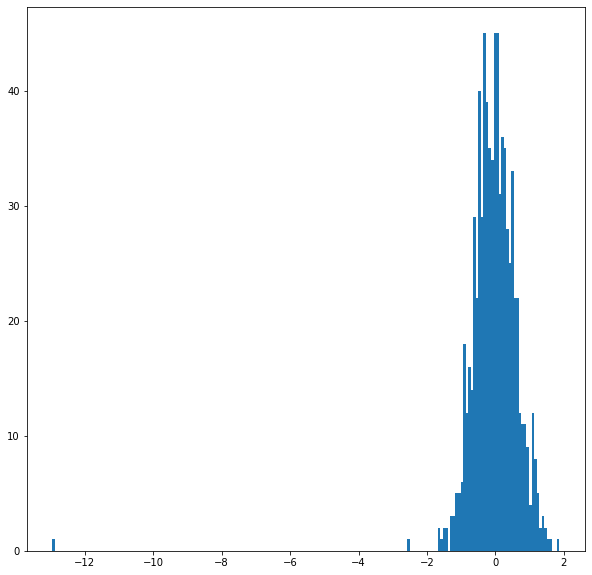

In [18]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [19]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
token_embeddings = [] 

# For each token in the sentence...
for token_i in range(len(tokenized_text)):
  
  # Holds 12 layers of hidden states for each token 
  hidden_layers = [] 
  
  # For each of the 12 layers...
  for layer_i in range(len(encoded_layers)):
    
    # Lookup the vector for `token_i` in `layer_i`
    vec = encoded_layers[layer_i][batch_i][token_i]
    
    hidden_layers.append(vec)
    
  token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

Number of tokens in sequence: 22
Number of layers per token: 12


## Word vector

In [20]:
concatenated_last_4_layers = [torch.cat((layer[-1], layer[-2], layer[-3], layer[-4]), 0) for layer in token_embeddings] # [number_of_tokens, 3072]
summed_last_4_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings] # [number_of_tokens, 768]

In [21]:
concatenated_last_4_layers

[tensor([-0.2645,  0.0118, -0.5196,  ...,  0.0466, -0.2235,  0.2095]),
 tensor([-0.2265, -0.2834, -0.0875,  ..., -0.8298, -0.1159, -0.3779]),
 tensor([-0.4162, -0.4183,  0.0928,  ..., -0.6437,  0.1863, -0.2842]),
 tensor([ 0.3113, -0.7209, -0.2450,  ..., -0.0557,  0.4976,  0.2368]),
 tensor([-0.4247, -0.6139,  0.1371,  ...,  0.1377,  0.3494, -0.9983]),
 tensor([-0.4634, -0.7436, -0.1392,  ...,  0.2973,  0.5302, -0.4605]),
 tensor([ 0.6338, -0.1551, -0.1847,  ...,  0.5375,  0.1863,  0.0157]),
 tensor([ 0.5584, -0.6761, -0.0629,  ..., -0.1161,  0.6088,  1.3613]),
 tensor([ 0.5364,  0.0486,  0.0505,  ..., -0.5968, -0.2157,  0.4011]),
 tensor([-0.7925, -0.4334, -0.0594,  ..., -0.1212,  0.0597, -0.4421]),
 tensor([ 0.5344, -0.0954, -0.1938,  ...,  0.2255, -0.0412, -0.0305]),
 tensor([ 0.1780, -0.3173,  0.0030,  ..., -0.9118,  0.4455, -1.2400]),
 tensor([-0.5392, -0.2377,  0.2406,  ..., -0.5528, -0.2968, -0.7535]),
 tensor([-0.3850, -0.2250,  0.0333,  ..., -0.0341, -0.3135, -0.6606]),
 tenso

In [22]:
summed_last_4_layers

[tensor([-2.6306e+00, -2.2451e+00, -3.1358e+00,  2.0708e+00,  1.8272e+00,
         -1.3740e-01,  1.6809e+00,  9.4559e-01, -2.9427e-01, -1.8018e+00,
          8.1256e-01,  1.1021e+00, -1.7366e-01,  2.0155e+00, -7.5454e-01,
         -2.9927e-01,  5.5298e-01,  2.0107e+00,  2.1385e+00, -2.1416e+00,
          8.1449e-02,  3.5566e-01,  8.6149e-01, -1.3311e+00,  5.3883e-01,
         -9.7606e-01, -7.3520e-01,  9.2488e-01, -7.6107e-01,  2.5074e+00,
         -6.5298e-02, -5.8470e-01,  1.6037e-01, -3.1701e+00,  1.9832e+00,
          4.3267e-01,  1.2920e+00,  7.9987e-01,  1.0158e+00,  2.2115e+00,
          1.0501e-01,  4.9985e-01, -1.3060e+00,  1.5409e-01,  1.6887e+00,
         -2.8884e+00, -1.2501e+01,  3.4374e-01,  1.2510e+00,  4.6813e-01,
          1.7750e+00,  1.7520e+00, -2.4989e+00,  2.2025e+00,  8.2282e-01,
          2.6252e+00, -1.2008e+00,  6.6441e-01,  5.6105e-01, -4.9104e-01,
         -3.2117e-02, -9.8843e-01,  4.7313e-01, -1.8161e+00, -2.2081e+00,
         -2.1865e+00,  1.2662e+00,  2.

## Sentence Vectors

In [23]:
sentence_embedding = torch.mean(encoded_layers[11], 1)

In [24]:
print ("Our final sentence embedding vector of shape:"), sentence_embedding[0].shape[0]

Our final sentence embedding vector of shape:


(None, 768)

## Confirming contextually dependent vectors

In [25]:
print (text)

After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank.


In [26]:
for i,x in enumerate(tokenized_text):
  print (i,x)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [27]:
print ("First fifteen values of 'bank' as in 'bank robber':")
summed_last_4_layers[10][:15]

First fifteen values of 'bank' as in 'bank robber':


tensor([ 1.1868, -1.5298, -1.3770,  1.0648,  3.1446,  1.4003, -4.2407,  1.3946,
        -0.1170, -1.8777,  0.1091, -0.3862,  0.6744,  2.1924, -4.5306])

In [28]:
print ("First fifteen values of 'bank' as in 'bank vault':")
summed_last_4_layers[6][:15]

First fifteen values of 'bank' as in 'bank vault':


tensor([ 2.1319, -2.1413, -1.6260,  0.8638,  3.3173,  0.1797, -4.4853,  3.1215,
        -0.9740, -3.1780,  0.1046, -1.5481,  0.4758,  1.1703, -4.4859])